In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

import utils as ut
import model_env as me
import tab_agents as tab

In [2]:
traj_df = pd.read_pickle('./traj_df.pkl')

In [3]:
gamma = 0.9
epsilon = 0.05
alpha = .01
runtime = 10000

In [4]:
dist_dict = ut.make_dist_dict(traj_df)#,smoothenpars={'smooth_par':0.05,'iters':50})


'''
Running the script 
'''
worm = me.FakeWorm(dist_dict)
alph_mouse = tab.Q_Alpha_Agent(worm,gamma=gamma,epsilon=epsilon,alpha=alpha)

alpha_mouse_learned, rewards, eval_rewards = tab.learner(alph_mouse,worm,episodes=runtime)

Eval 0: average 0.9552978122427955
Eval 1: average 1.1821037278757474


IndexError: index 12 is out of bounds for axis 1 with size 12

In [ ]:
# Note something's up with the environment or agent; keep getting out of index range errors

# With binned body angle

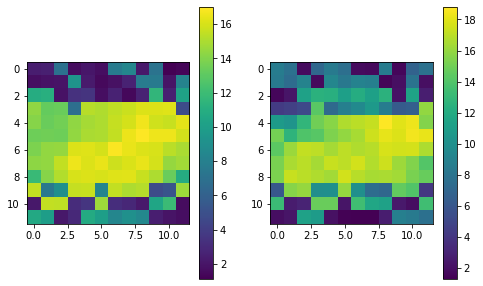

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((8,5))
for i in range(2):
    im = ax[i].imshow(alph_mouse.Qtab[:,i].reshape(12,12))
    fig.colorbar(im,ax=ax[i])

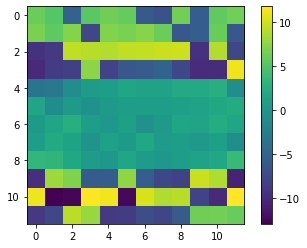

In [18]:
plt.imshow(alpha_mouse_learned.Qtab[:,1].reshape(12,12)-alpha_mouse_learned.Qtab[:,0].reshape(12,12))
plt.colorbar()

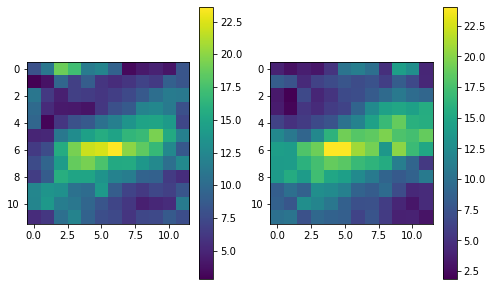

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((8,5))
for i in range(2):
    im = ax[i].imshow(alph_mouse.Qtab[:,i].reshape(12,12))
    fig.colorbar(im,ax=ax[i])

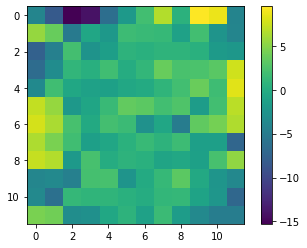

In [8]:
plt.imshow(alph_mouse.Qtab[:,1].reshape(12,12)-alph_mouse.Qtab[:,0].reshape(12,12))
plt.colorbar()

In [5]:
worm.grid2coords(worm.state)

(1, 12)

In [6]:
worm.state

array([-150,  180])

In [8]:
for i in range(144):
    print(worm.obs2grid(i))

[-180 -180]
[-180 -150]
[-180 -120]
[-180  -90]
[-180  -60]
[-180  -30]
[-180    0]
[-180   30]
[-180   60]
[-180   90]
[-180  120]
[-180  150]
[-150 -180]
[-150 -150]
[-150 -120]
[-150  -90]
[-150  -60]
[-150  -30]
[-150    0]
[-150   30]
[-150   60]
[-150   90]
[-150  120]
[-150  150]
[-120 -180]
[-120 -150]
[-120 -120]
[-120  -90]
[-120  -60]
[-120  -30]
[-120    0]
[-120   30]
[-120   60]
[-120   90]
[-120  120]
[-120  150]
[ -90 -180]
[ -90 -150]
[ -90 -120]
[-90 -90]
[-90 -60]
[-90 -30]
[-90   0]
[-90  30]
[-90  60]
[-90  90]
[-90 120]
[-90 150]
[ -60 -180]
[ -60 -150]
[ -60 -120]
[-60 -90]
[-60 -60]
[-60 -30]
[-60   0]
[-60  30]
[-60  60]
[-60  90]
[-60 120]
[-60 150]
[ -30 -180]
[ -30 -150]
[ -30 -120]
[-30 -90]
[-30 -60]
[-30 -30]
[-30   0]
[-30  30]
[-30  60]
[-30  90]
[-30 120]
[-30 150]
[   0 -180]
[   0 -150]
[   0 -120]
[  0 -90]
[  0 -60]
[  0 -30]
[0 0]
[ 0 30]
[ 0 60]
[ 0 90]
[  0 120]
[  0 150]
[  30 -180]
[  30 -150]
[  30 -120]
[ 30 -90]
[ 30 -60]
[ 30 -30]
[30  0]


In [9]:
np.random.choice(144)

121